# Imports and Settings

In [1]:
import os
import sys

import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ydata_profiling import ProfileReport

/tmp/ipykernel_12318/4042690136.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Allow imports from parent directory
notebook_dir = os.getcwd()
parent_dir = os.path.dirname(notebook_dir)
sys.path.append(parent_dir)

In [3]:
from eda_utils import *

# Loading

In [4]:
%%time
df = pd.read_csv("../data/SBAnational.csv")

<timed exec>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 3.26 s, sys: 4.1 s, total: 7.36 s
Wall time: 7.36 s


# Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

# Removing Leaking Features

In [6]:
target_leaking_cols = [
    "ChgOffDate", "DisbursementDate", "DisbursementGross", "BalanceGross", "ChgOffPrinGr"
]
df = df.drop(columns = target_leaking_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanNr_ChkDgt  899164 non-null  int64  
 1   Name           899150 non-null  object 
 2   City           899134 non-null  object 
 3   State          899150 non-null  object 
 4   Zip            899164 non-null  int64  
 5   Bank           897605 non-null  object 
 6   BankState      897598 non-null  object 
 7   NAICS          899164 non-null  int64  
 8   ApprovalDate   899164 non-null  object 
 9   ApprovalFY     899164 non-null  object 
 10  Term           899164 non-null  int64  
 11  NoEmp          899164 non-null  int64  
 12  NewExist       899028 non-null  float64
 13  CreateJob      899164 non-null  int64  
 14  RetainedJob    899164 non-null  int64  
 15  FranchiseCode  899164 non-null  int64  
 16  UrbanRural     899164 non-null  int64  
 17  RevLineCr      894636 non-nul

# Other Columns to Drop?

## `LoanNr_ChkDgt`

It seems to be the id of each row.

Hence, it shouldn't carry any information and should be discarded.

In [7]:
df = df.drop(columns="LoanNr_ChkDgt")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           899150 non-null  object 
 1   City           899134 non-null  object 
 2   State          899150 non-null  object 
 3   Zip            899164 non-null  int64  
 4   Bank           897605 non-null  object 
 5   BankState      897598 non-null  object 
 6   NAICS          899164 non-null  int64  
 7   ApprovalDate   899164 non-null  object 
 8   ApprovalFY     899164 non-null  object 
 9   Term           899164 non-null  int64  
 10  NoEmp          899164 non-null  int64  
 11  NewExist       899028 non-null  float64
 12  CreateJob      899164 non-null  int64  
 13  RetainedJob    899164 non-null  int64  
 14  FranchiseCode  899164 non-null  int64  
 15  UrbanRural     899164 non-null  int64  
 16  RevLineCr      894636 non-null  object 
 17  LowDoc         896582 non-nul

## `Name`

`Name` doesn't seem to be relevant.

Moreover, there's a huge amount of different modalities.

In [9]:
df.Name.nunique()

779583

👉 Hence, **it seems reasonable to drop it**.

In [10]:
df = df.drop("Name", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   City           899134 non-null  object 
 1   State          899150 non-null  object 
 2   Zip            899164 non-null  int64  
 3   Bank           897605 non-null  object 
 4   BankState      897598 non-null  object 
 5   NAICS          899164 non-null  int64  
 6   ApprovalDate   899164 non-null  object 
 7   ApprovalFY     899164 non-null  object 
 8   Term           899164 non-null  int64  
 9   NoEmp          899164 non-null  int64  
 10  NewExist       899028 non-null  float64
 11  CreateJob      899164 non-null  int64  
 12  RetainedJob    899164 non-null  int64  
 13  FranchiseCode  899164 non-null  int64  
 14  UrbanRural     899164 non-null  int64  
 15  RevLineCr      894636 non-null  object 
 16  LowDoc         896582 non-null  object 
 17  MIS_Status     897167 non-nul

## `City` or `Zip`?

In [11]:
df.City.isna().sum()

30

In [12]:
df.Zip.isna().sum()

0

In [13]:
df.City.nunique()

32581

In [14]:
df.Zip.nunique()

33611

👉 `Zip` has no missing values and seem to carry more information than `City`.

Hence, it could be one or the other.

Anyway, these features are categorical, despite of `Zip` being an integer, with a huge amount of modalities. Therefore, we should envision ways to encode them efficiently:
- Binary Encoding,
- Feature Hashing,
- Target Encoding.

# Duplicates and Missing Values

## Duplicates

In [15]:
df.duplicated().sum()

305

👉 **There are a few duplicates**.

## Missing Values

### Cartography

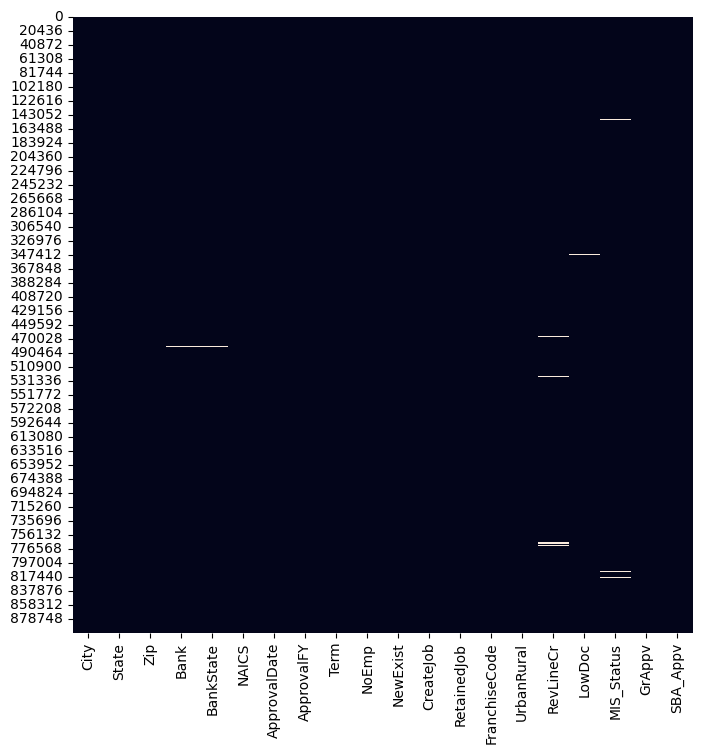

CPU times: user 10.8 s, sys: 1.12 s, total: 11.9 s
Wall time: 11.6 s


In [16]:
%%time
plt.figure(figsize=(8, 8))
sns.heatmap(df.isna(), cbar=None)
plt.show()

Missing Values seem relatively "marginal", and limited to spotted columns.

### Estimation

In [17]:
def quantify_NaNs(df: pd.DataFrame, col: str) -> None:
    """
    Display a report about NaN values (encoded as np.nan).
    """
    number = df[col].isna().sum()
    ratio = df[col].isna().mean()
    title = f"Nan Values for feature: {col}"
    number_display = f"Number: {number:,}"
    ratio_display = f"Proportion: {ratio * 100:.2f}%"
    endline = "-" * max(len(number_display), len(ratio_display), len(title))
    print(title)
    print(number_display)
    print(ratio_display)
    print(endline)

In [18]:
quantify_NaNs(df, "Bank")

Nan Values for feature: Bank
Number: 1,559
Proportion: 0.17%
----------------------------


In [19]:
nan_cols = ["Bank", "BankState", "RevLineCr", "LowDoc", "MIS_Status"]
for nan_col in nan_cols:
    quantify_NaNs(df, nan_col)

Nan Values for feature: Bank
Number: 1,559
Proportion: 0.17%
----------------------------
Nan Values for feature: BankState
Number: 1,566
Proportion: 0.17%
---------------------------------
Nan Values for feature: RevLineCr
Number: 4,528
Proportion: 0.50%
---------------------------------
Nan Values for feature: LowDoc
Number: 2,582
Proportion: 0.29%
------------------------------
Nan Values for feature: MIS_Status
Number: 1,997
Proportion: 0.22%
----------------------------------


👉 **All these features are categorical**.

### Missing Values in Target

👉 **We'll separate the dataset**:
- keep in `df` features with known labels
- **keep for later features with missing labels**, as an additional "test set". 

In [20]:
df_na_target = df.query("MIS_Status.isna()")
df_na_target

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
343,Saratoga Springs,NY,12866,KEYBANK NATIONAL ASSOCIATION,OH,0,18-May-98,1998,60,3,1.0,0,0,1,0,0,N,NaN,"$30,000.00","$15,000.00"
611,DANIELSON,CT,6239,NaN,NaN,0,7-Jul-80,1980,180,30,2.0,0,0,0,0,N,N,NaN,"$300,000.00","$300,000.00"
738,BOISE,ID,83703,WELLS FARGO BANK NATL ASSOC,SD,0,3-Mar-97,1997,60,1,1.0,0,0,1,0,T,N,NaN,"$10,000.00","$5,000.00"
740,SIOUX CITY,IA,51111,NaN,NaN,0,3-Jul-80,1980,120,3,1.0,0,0,0,0,N,N,NaN,"$350,000.00","$350,000.00"
833,HUNTINGTON,NY,11743,JPMORGAN CHASE BANK NATL ASSOC,IL,424330,3-Mar-03,2003,84,1,2.0,0,0,1,0,N,N,NaN,"$25,000.00","$12,500.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892340,ALAMEDA,CA,94605,WELLS FARGO BANK NATL ASSOC,SD,0,19-Dec-96,1997,84,1,1.0,0,0,1,0,0,N,NaN,"$50,000.00","$25,000.00"
893791,SAN GABRIEL,CA,91776,WELLS FARGO BANK NATL ASSOC,SD,0,6-Jan-97,1997,84,4,1.0,0,0,1,0,0,N,NaN,"$25,000.00","$12,500.00"
894290,PORTLAND,OR,97206,WELLS FARGO BANK NATL ASSOC,SD,0,10-Jan-97,1997,84,1,1.0,0,0,1,0,T,N,NaN,"$10,000.00","$5,000.00"
896318,RICHMOND,VA,23225,FIRST COMMUNITY BANK,VA,0,30-Jan-97,1997,36,1,2.0,0,0,1,0,N,Y,NaN,"$3,500.00","$2,800.00"


In [21]:
df = df.query("not MIS_Status.isna()")

### ❌ Global Strategy for Missing Values

- `Bank` and `BankState` as `missing`
- `RevLineCR`: `"O"` for "Others"
- `LowDoc`: ❌ `"Missing"`

⚠️ Should consider to include it in Pipeline

# Cleaning and Encoding Features One by One

## `Bank` ❌

In [22]:
# As a reminder
quantify_NaNs(df, "Bank")

Nan Values for feature: Bank
Number: 1,506
Proportion: 0.17%
----------------------------


👉 Let's **encode them as "Missing"**.

In [23]:
df.Bank = df.Bank.fillna("Missing")

In [24]:
# Check-Out
quantify_NaNs(df, "Bank")

Nan Values for feature: Bank
Number: 0
Proportion: 0.00%
----------------------------


In [25]:
df.Bank.nunique()

5802

### Options (❌ Include links to transformers)

👉 **Possible Options are:**
- One-Hot-Encoding with a beforehand preprocess, meaning:
  - Deciding on a number of modalities (bank names) to keep
  - Filtering `df` and tagging remaining banks as "Other" (exclude "missing"?)
- Binary Encoding
- Feature Hashing
- [**Target encoding**](https://snippets.cacher.io/snippet/4b06c26e3c42f10f0e5b)

## BankState ➡️ One-Hot-Encoding

The missing values are corresponding to the previous ones.

Hence, we'll opt for a similar imputing.

In [26]:
df.BankState = df.BankState.fillna("Missing")

In [27]:
df.BankState.unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID',
       'Missing', 'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK',
       'GU', 'AN', 'EN', 'VI'], dtype=object)

## NAICS ➡️ One-Hot-Encoding

In [28]:
quantify_NaNs(df, "NAICS")

Nan Values for feature: NAICS
Number: 0
Proportion: 0.00%
-----------------------------


☝️ There doesn't seem to be any missing values, but... 

In [29]:
df.NAICS.nunique()

1312

In [30]:
df.NAICS.unique()

array([451120, 722410, 621210, ..., 315280, 922140, 221121])

In [31]:
df.NAICS.value_counts(normalize=True)

NAICS
0         0.224782
722110    0.031144
722211    0.021663
811111    0.016205
621210    0.015643
            ...   
212231    0.000001
925120    0.000001
524192    0.000001
311351    0.000001
333241    0.000001
Name: proportion, Length: 1312, dtype: float64

🔎 **There are around 22% missing values, encoded as `0`**.

👉 **We'll assign them to an `"unknown"` category**.

In [32]:
NAICS_MAPPING = {
    "0": "unknown",
    "11": "agriculture_forestry_fishing_and_hunting",
    "21": "mining_quarrying_and_oil_and_gas_extraction",
    "22": "utilities",
    "23": "construction",
    "31": "manufacturing",
    "32": "manufacturing",
    "33": "manufacturing",
    "42": "wholesale_trade",
    "44": "retail_trade",
    "45": "retail_trade",
    "48": "transportation_and_warehousing",
    "49": "transportation_and_warehousing",
    "51": "information",
    "52": "finance_and_insurance",
    "53": "real_estate_and_rental_and_leasing",
    "54": "professionnal_scientific_and_technical_services",
    "55": "management_of_companies_and_entreproses",
    "56": "administrative_and_support_and_waste_management_and_remediation_services",
    "61": "educational_services",
    "62": "health_care_and_social_assistance",
    "71": "arts_entertainment_and_recreation",
    "72": "accomodation_and_food_services",
    "81": "other_services_except_public_administration",
    "92": "public_administration"
}

def map_NAICS_to_cats(n: int) -> str:
    """Map a NAICS integer to its counterpart category"""
    cat_digits = str(n)[:2]
    return NAICS_MAPPING.get(cat_digits)

In [33]:
(df.NAICS
 .map(map_NAICS_to_cats)
 .value_counts(normalize=True)
 .mul(100)
)

NAICS
unknown                                                                     22.478201
retail_trade                                                                14.152883
other_services_except_public_administration                                  8.069289
professionnal_scientific_and_technical_services                              7.570720
manufacturing                                                                7.568602
accomodation_and_food_services                                               7.524909
construction                                                                 7.411329
health_care_and_social_assistance                                            6.159834
wholesale_trade                                                              5.425188
administrative_and_support_and_waste_management_and_remediation_services     3.625746
transportation_and_warehousing                                               2.497640
arts_entertainment_and_recreation               

In [34]:
df.NAICS = df.NAICS.map(map_NAICS_to_cats)

## `ApprovalDate` ➡️ Feature Engineering

🔎 **This is a column containing dates (we also have the corresponding year) encoded as strings**

👉 **We will extract `ApprovalMonth` and `ApprovalDoW` (day of week) of this column, then drop it**.

### Transtype to Dates

#### Exploration

In [35]:
df.ApprovalDate

0         28-Feb-97
1         28-Feb-97
2         28-Feb-97
3         28-Feb-97
4         28-Feb-97
            ...    
899159    27-Feb-97
899160    27-Feb-97
899161    27-Feb-97
899162    27-Feb-97
899163    27-Feb-97
Name: ApprovalDate, Length: 897167, dtype: object

In [36]:
# Checking months
(df.ApprovalDate
 .str.split("-")
 .map(lambda lis: lis[1])
 .unique()
)

array(['Feb', 'Jun', 'Oct', 'Mar', 'Apr', 'May', 'Jul', 'Aug', 'Sep',
       'Nov', 'Dec', 'Jan'], dtype=object)

In [37]:
# Checking days
print(sorted(df.ApprovalDate
 .str.split("-")
 .map(lambda lis: int(lis[0]))
 .unique()
))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [38]:
# Checking years
print(sorted(df.ApprovalDate
 .str.split("-")
 .map(lambda lis: int(lis[2]))
 .unique()
))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [39]:
dates_69 = df.query("ApprovalDate.str.endswith('69')").ApprovalDate
dates_69

726149    28-Apr-69
747668    13-Oct-69
754386     9-Oct-69
Name: ApprovalDate, dtype: object

#### ⚠️ WARNING

In [40]:
pd.to_datetime(dates_69)

/tmp/ipykernel_12318/2825988936.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(dates_69)


726149   2069-04-28
747668   2069-10-13
754386   2069-10-09
Name: ApprovalDate, dtype: datetime64[ns]

☝️ These results show the purpose of the warning: specify that, **without a proper date format, the dates risk to be badly encoded with a badly inferred format**.

👉 Proper format found thanks to [**this documentation**](https://foragoodstrftime.com/)

In [41]:
pd.to_datetime(dates_69, format="%d-%b-%y")

726149   1969-04-28
747668   1969-10-13
754386   1969-10-09
Name: ApprovalDate, dtype: datetime64[ns]

#### Clean Transtyping

In [42]:
df.ApprovalDate = pd.to_datetime(df.ApprovalDate, format="%d-%b-%y")

☝️ Notice that **there's no longer any warning**.

In [43]:
df.ApprovalDate

0        1997-02-28
1        1997-02-28
2        1997-02-28
3        1997-02-28
4        1997-02-28
            ...    
899159   1997-02-27
899160   1997-02-27
899161   1997-02-27
899162   1997-02-27
899163   1997-02-27
Name: ApprovalDate, Length: 897167, dtype: datetime64[ns]

In [44]:
df.sample()

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
106509,CARLE PLACE,NY,11514,JPMORGAN CHASE BANK NATL ASSOC,IL,accomodation_and_food_services,2006-04-24,2006,60,12,1.0,0,12,0,1,N,N,P I F,"$35,000.00","$17,500.00"


### Feature Engineering

👉 Based on this feature, **we will create two new ones, being `ApprovalMonth` and `ApprovalDayOfWeek`**.

In [45]:
df['ApprovalMonth'] = df.ApprovalDate.dt.month
print(sorted(df.ApprovalMonth.unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [46]:
# Répartition en pourcentage des modalités
(df.ApprovalMonth
 .value_counts(normalize=True)
 .map(lambda x: round(x * 100, 2))
 .reset_index()
 .rename(columns={
     'ApprovalDate': 'ApprovalMonth',
     'proportion': 'percentage'
 })
 .sort_values(by="ApprovalMonth")
)

,ApprovalMonth,percentage
10,1,7.46
11,2,7.38
0,3,9.30
2,4,8.92
5,5,8.59
4,6,8.71
6,7,8.51
3,8,8.76
1,9,9.23
8,10,7.76


In [47]:
df['ApprovalDoW'] = df.ApprovalDate.dt.dayofweek
print(sorted(df.ApprovalDoW.unique()))

[0, 1, 2, 3, 4, 5, 6]


☝️ **With this encoding, `0` is for monday and so on...**

In [48]:
# Répartition en pourcentage des modalités
(df.ApprovalDoW
 .value_counts(normalize=True)
 .map(lambda x: round(x * 100, 2))
 .reset_index()
 .rename(columns={
     'ApprovalDate': 'ApprovalDoW',
     'proportion': 'percentage'
 })
 .sort_values(by="ApprovalDoW")
)

,ApprovalDoW,percentage
4,0,15.69
3,1,20.32
1,2,20.94
2,3,20.80
0,4,21.88
5,5,0.32
6,6,0.04


### 🔩 Next Step: Cyclical Encoding

This will be performed within pipeline in order to be able to find trends in *month* data.

The same will obviously be done with *day of week*.

🌐 [**Lien vers le code du transformer**](https://snippets.cacher.io/snippet/bade07859818be3395cd)

### Reordering Columns

To make all date-related columns next to each other.

In [49]:
df = df[['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS',
       'ApprovalDate', 'ApprovalMonth', 'ApprovalDoW', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob',
       'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc',
       'MIS_Status', 'GrAppv', 'SBA_Appv']]

## `ApprovalFY`

### Exploration

In [50]:
years = df.ApprovalFY.unique()
years

array([1997, 1980, 2006, 1998, 1999, 2000, 2001, 1972, 2003, 2004, 1978,
       1979, 1981, 2005, 1982, 1966, 1983, 1973, 1984, 2007, 1985, 1986,
       1987, 2008, 1988, 2009, 1989, 1991, 1990, 1974, 2010, 2011, 1992,
       1993, 2002, 2012, 2013, 1994, 2014, 1975, 1977, 1976, '2004',
       '1994', '1979', '1976', '1975', '1974', '1977', '1981', '1982',
       '1983', '1984', '1978', '1980', '1968', '1976A', '1969', '1995',
       '1970', '2005', '1996', '1971', 1996, 1971], dtype=object)

🔎 Unfortunately, there are **mixed types**, but **there is worse**...

In [51]:
str_years = [year for year in years if isinstance(year, str)]
print(sorted(str_years))

['1968', '1969', '1970', '1971', '1974', '1975', '1976', '1976A', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1994', '1995', '1996', '2004', '2005']


In [52]:
int_years = [year for year in years if isinstance(year, int)]
print(sorted(int_years))

[1966, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


🔎 There are **overlaps in these mixed types**, which, after thinking twice about it, won't do any harm... But **there is an oddity**...

### '1976' and '1976A' 🤔

👉 **What could `1976A` refer to?**

In [53]:
df_1976A = df.query("ApprovalFY == '1976A'")
df_1976A

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalMonth,ApprovalDoW,ApprovalFY,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
699732,CARLSTADT,NJ,7072,VALLEY NATIONAL BANK,NJ,unknown,1976-09-29,9,2,1976A,...,1.0,0,0,0,0,N,N,CHGOFF,"$350,000.00","$315,000.00"
704030,FOLLETT,TX,79034,FIRSTBANK SOUTHWEST,TX,unknown,1976-09-17,9,4,1976A,...,1.0,0,0,0,0,N,N,CHGOFF,"$325,000.00","$292,500.00"
705375,CROWN POINT,IN,46307,JPMORGAN CHASE BANK NATL ASSOC,IN,unknown,1976-09-10,9,4,1976A,...,2.0,0,0,0,0,N,N,CHGOFF,"$145,000.00","$130,500.00"
710381,ODESSA,NY,14869,CHEMUNG CANAL TRUST COMPANY,NY,unknown,1976-07-19,7,0,1976A,...,2.0,0,0,0,0,N,N,CHGOFF,"$15,000.00","$13,500.00"
713245,SPRINGFIELD,MA,1103,BANK OF AMERICA NATL ASSOC,RI,unknown,1976-08-30,8,0,1976A,...,1.0,0,0,0,0,N,N,CHGOFF,"$73,000.00","$40,150.00"
748029,COLUMBUS,OH,43265,"PNC BANK, NATIONAL ASSOCIATION",OH,unknown,1976-08-20,8,4,1976A,...,1.0,0,0,0,0,N,N,CHGOFF,"$150,000.00","$135,000.00"
751519,CHICAGO,IL,60633,BANK OF AMERICA NATL ASSOC,NC,unknown,1976-09-29,9,2,1976A,...,2.0,0,0,0,0,N,N,CHGOFF,"$550,000.00","$495,000.00"
769515,UVALDE,TX,78801,BANK OF AMERICA NATL ASSOC,TX,unknown,1976-07-19,7,0,1976A,...,2.0,0,0,0,0,N,N,CHGOFF,"$85,000.00","$76,500.00"
775002,YUCAIPA,CA,92399,BANK OF AMERICA NATL ASSOC,CA,unknown,1976-08-20,8,4,1976A,...,1.0,0,0,0,0,N,N,CHGOFF,"$94,500.00","$85,050.00"
775430,DYERSVILLE,IA,52040,FDIC/DYERSVILLE,IL,unknown,1976-08-26,8,3,1976A,...,1.0,0,0,0,0,N,N,P I F,"$72,000.00","$64,800.00"


In [54]:
df_1976A.ApprovalDate.min(), df_1976A.ApprovalDate.max()

(Timestamp('1976-07-15 00:00:00'), Timestamp('1976-09-30 00:00:00'))

In [55]:
df_1976 = df.query("ApprovalFY == '1976'")
df_1976

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalMonth,ApprovalDoW,ApprovalFY,...,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv
688848,COLUMBUS,OH,43229,"PNC BANK, NATIONAL ASSOCIATION",OH,unknown,1975-08-28,8,3,1976,...,2.0,0,0,0,0,N,N,CHGOFF,"$35,000.00","$31,500.00"
688859,NEW CARLISLE,OH,45344,"PNC BANK, NATIONAL ASSOCIATION",OH,unknown,1975-09-12,9,4,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$125,000.00","$112,500.00"
689770,KENNER,LA,70062,REGIONS BANK,LA,unknown,1976-04-01,4,3,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$100,000.00","$90,000.00"
689791,RACELAND,LA,70394,REGIONS BANK,TN,unknown,1976-04-02,4,4,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$160,000.00","$144,000.00"
694492,DAYTON,OH,45407,JPMORGAN CHASE BANK NATL ASSOC,OH,unknown,1976-05-26,5,2,1976,...,1.0,0,0,0,0,N,N,P I F,"$30,000.00","$27,000.00"
697578,VALPARAISO,IN,46383,MB FINAN BANK NATL ASSOC,IL,unknown,1976-04-20,4,1,1976,...,2.0,0,0,0,0,N,N,CHGOFF,"$100,000.00","$90,000.00"
699236,WEST NEW YORK,NJ,7093,BANCO POPULAR NORTH AMERICA,NY,unknown,1975-09-12,9,4,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$150,000.00","$135,000.00"
699382,NEW ROCHELLE,NY,10804,"TD BANK, NATIONAL ASSOCIATION",NJ,unknown,1976-01-27,1,1,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$135,000.00","$121,500.00"
699383,BORDENTOWN,NJ,8505,"PNC BANK, NATIONAL ASSOCIATION",DE,unknown,1976-01-30,1,4,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$42,000.00","$37,800.00"
699387,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,NJ,unknown,1976-01-30,1,4,1976,...,1.0,0,0,0,0,N,N,CHGOFF,"$38,000.00","$34,200.00"


In [56]:
df_1976.ApprovalDate.min(), df_1976.ApprovalDate.max()

(Timestamp('1975-07-31 00:00:00'), Timestamp('1976-06-23 00:00:00'))

🔎 These are probably dates referring to **fiscal** years. Let's compare to other years, implementing a convenience function.

But first, let's convert all elements to strings.

In [57]:
df.ApprovalFY = df.ApprovalFY.astype("str")

In [58]:
years = sorted(df.ApprovalFY.unique())
print(years)

['1966', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1976A', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [59]:
def get_year_bounds(year: str) -> None:
    """Displays boundaries of a year"""
    df_year = df.query("ApprovalFY == @year")
    min_day = df_year.ApprovalDate.min()
    max_day = df_year.ApprovalDate.max()
    print(f"{year} goes...")
    print(f"From: {min_day}")
    print(f"To:   {max_day}")
    print("-" * 25)

In [60]:
for year in years:
    get_year_bounds(year)

1966 goes...
From: 2066-05-18 00:00:00
To:   2066-05-18 00:00:00
-------------------------
1968 goes...
From: 2068-02-09 00:00:00
To:   2068-02-09 00:00:00
-------------------------
1969 goes...
From: 1969-04-28 00:00:00
To:   2068-12-03 00:00:00
-------------------------
1970 goes...
From: 1969-10-09 00:00:00
To:   1970-05-13 00:00:00
-------------------------
1971 goes...
From: 1970-07-22 00:00:00
To:   1971-05-28 00:00:00
-------------------------
1972 goes...
From: 1971-07-13 00:00:00
To:   1972-06-15 00:00:00
-------------------------
1973 goes...
From: 1972-07-17 00:00:00
To:   1973-06-25 00:00:00
-------------------------
1974 goes...
From: 1973-07-03 00:00:00
To:   1974-06-27 00:00:00
-------------------------
1975 goes...
From: 1974-07-26 00:00:00
To:   1975-06-26 00:00:00
-------------------------
1976 goes...
From: 1975-07-25 00:00:00
To:   1976-06-23 00:00:00
-------------------------
1976A goes...
From: 1976-07-15 00:00:00
To:   1976-09-30 00:00:00
------------------------

☝️ Despite us being very cautious for transtyping dates, **there are still remaining errors for the 3 first years**...

👉 Nevertheless, **as we plan to drop the column and manage the years with the devoted column, this shouldn't cause any harm**.

### Mapping Years and Recessions

☝️ It seemed relevant to us to be able to **know if the `ApprovalFY` is related to an economical recession**.

👉 In order to do that, we:
- queried the *National Bureau of Economic Research* to **determine the recession periods in the USA**, then...
- **implemented a custom mapping function**.

In [61]:
# According to National Bureau of Economic Research
# This is valid until 2023...
recession_periods = [
    (1969, 1970),
    (1973, 1975),
    (1980, 1980),
    (1981, 1982),
    (1990, 1991),
    (2001, 2001),
    (2007, 2009),
    (2020, 2020),  # Including the COVID-19 pandemic recession
]

In [62]:
def is_year_a_recession(year_str: str) -> bool:
    try:
        year = int(year_str)
    except ValueError:
        year = int(year_str[:-1])
    return any(start <= year <= end for start, end in recession_periods)

In [63]:
# Small tests
assert is_year_a_recession("1976A") == False
assert is_year_a_recession("1975") == True

In [64]:
df["Recession"] = df.ApprovalFY.map(is_year_a_recession)

In [65]:
df.Recession.value_counts(normalize=True)

Recession
False    0.777131
True     0.222869
Name: proportion, dtype: float64

## `Term` [int]

In [66]:
df.Term.nunique()

412

### Aberrant Values

In [67]:
print(sorted(df.Term.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

🔎 `0` seems a **weird value**... Let's investigate it.

In [68]:
df.query("Term == 0")

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalMonth,ApprovalDoW,ApprovalFY,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Recession
635,SAN ANSELMO,CA,94960,CALIFORNIA BANK & TRUST,CA,retail_trade,2001-06-25,6,0,2001,...,0,0,1,0,Y,N,CHGOFF,"$29,000.00","$14,500.00",True
673,BROOKLYN,NY,11226,WELLS FARGO BANK NATL ASSOC,SD,wholesale_trade,2006-02-07,2,1,2006,...,7,10,1,1,Y,N,CHGOFF,"$30,000.00","$15,000.00",False
776,LAS VEGAS,NV,89118,CALIFORNIA BANK & TRUST,CA,manufacturing,2003-01-10,1,4,2003,...,0,0,1,0,Y,N,CHGOFF,"$50,000.00","$25,000.00",False
916,MIAMI,FL,33145,CALIFORNIA BANK & TRUST,CA,manufacturing,2003-04-18,4,4,2003,...,0,0,1,0,N,N,CHGOFF,"$150,000.00","$75,000.00",False
1084,WARWICK,RI,2888,BANK RHODE ISLAND,RI,real_estate_and_rental_and_leasing,2003-07-31,7,3,2003,...,0,0,1,0,Y,N,CHGOFF,"$150,000.00","$75,000.00",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891986,SAN JOSE,CA,95124,WELLS FARGO BANK NATL ASSOC,SD,other_services_except_public_administration,2006-02-02,2,3,2006,...,2,4,1,1,Y,N,CHGOFF,"$16,000.00","$8,000.00",False
894913,ST. LOUIS,MO,63102,EAGLE BK & TR CO OF MISSOURI,MO,unknown,1997-01-16,1,3,1997,...,0,0,1,0,N,Y,CHGOFF,"$93,000.00","$74,400.00",False
895325,GRAND RAPIDS,MI,49501,UNITED BANK OF MICHIGAN,MI,retail_trade,1997-01-22,1,2,1997,...,0,0,1,0,0,N,CHGOFF,"$1,100,000.00","$748,000.00",False
896757,ELIZABETHTOWN,KY,42701,"PNC BANK, NATIONAL ASSOCIATION",KY,unknown,1997-02-05,2,2,1997,...,0,0,1,0,N,Y,CHGOFF,"$40,000.00","$32,000.00",False


In [69]:
df.query("Term == 0 and NAICS == 'unknown'")

,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalMonth,ApprovalDoW,ApprovalFY,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,MIS_Status,GrAppv,SBA_Appv,Recession
7065,UNIVERSITY PARK,TX,75205,GE CAP. SMALL BUS. FINAN CORP,TX,unknown,1997-03-19,3,2,1997,...,0,0,45150,0,N,N,CHGOFF,"$205,000.00","$153,750.00",False
12338,VICKSBURG,MS,39180,SMALL BUSINESS ADMINSITRATION,DC,unknown,1980-10-31,10,4,1981,...,0,0,0,0,N,N,CHGOFF,"$40,000.00","$36,000.00",True
14657,FLOWER MOUND,TX,75028,COMPASS BANK,TX,unknown,1997-04-08,4,1,1997,...,0,0,1,0,N,Y,CHGOFF,"$100,000.00","$80,000.00",False
16673,MIDDLETOWN,NY,10940,BANCO POPULAR NORTH AMERICA,NY,unknown,1997-04-11,4,4,1997,...,0,0,61401,0,N,Y,CHGOFF,"$41,000.00","$32,800.00",False
16943,LAREDO,TX,78041,WELLS FARGO BANK NATL ASSOC,TX,unknown,1980-12-12,12,4,1981,...,0,0,0,0,N,N,CHGOFF,"$100,000.00","$90,000.00",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881397,SAN ANTONIO,TX,78205,BANK OF THE WEST,CA,unknown,1996-09-25,9,2,1996,...,0,0,1,0,0,N,P I F,"$300,000.00","$225,000.00",False
885088,VAN NUYS,CA,91401,WELLS FARGO BANK NATL ASSOC,SD,unknown,1996-10-22,10,1,1997,...,0,0,1,0,0,N,CHGOFF,"$500,000.00","$375,000.00",False
894913,ST. LOUIS,MO,63102,EAGLE BK & TR CO OF MISSOURI,MO,unknown,1997-01-16,1,3,1997,...,0,0,1,0,N,Y,CHGOFF,"$93,000.00","$74,400.00",False
896757,ELIZABETHTOWN,KY,42701,"PNC BANK, NATIONAL ASSOCIATION",KY,unknown,1997-02-05,2,2,1997,...,0,0,1,0,N,Y,CHGOFF,"$40,000.00","$32,000.00",False


### ❌ Processing?

☝️ We need to decide **if we keep these values or drop them**.

### Distribution

In [70]:
df.Term.value_counts().head(20)

Term
84     228920
60      89869
240     85969
120     77624
300     44699
180     28134
36      19712
12      16992
48      15597
72       9416
24       7330
96       7147
90       6847
66       5211
87       4979
63       4598
83       4150
108      3951
144      3225
6        3050
Name: count, dtype: int64

/home/greg/projects/eda_loan/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


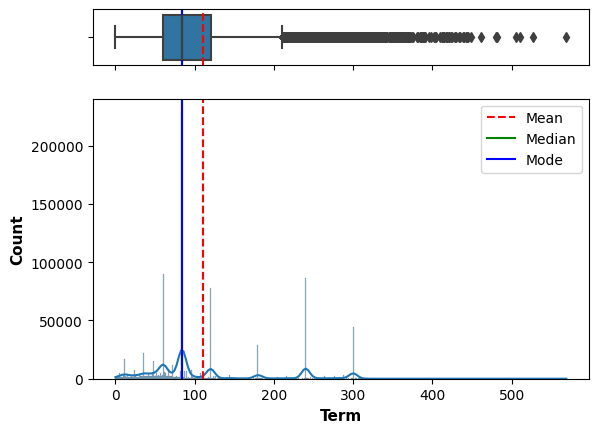

In [71]:
hist_box_plot("Term", df)

## `NoEmp` [Int - Skewed]

In [72]:
df.NoEmp.nunique()

598

In [73]:
print(sorted(df.NoEmp.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222,

☝️ `0` seems a bit weird but explainable...

In [74]:
df.NoEmp.value_counts(normalize=True).head(20)

NoEmp
1     0.171073
2     0.153756
3     0.100869
4     0.081938
5     0.067096
6     0.050927
10    0.035102
7     0.035041
8     0.034915
12    0.023183
15    0.020418
9     0.020189
20    0.015912
11    0.013128
14    0.011891
25    0.011083
13    0.010416
30    0.009621
18    0.008761
16    0.008741
Name: proportion, dtype: float64

## `NewExist` ➡️ One-Hot-Encoding (quasi-binary imbalanced)

### Issue With `NaN` Encoding

In [75]:
df.NewExist.value_counts(normalize=True, dropna=False)

NewExist
1.0    0.717198
2.0    0.281507
0.0    0.001146
NaN    0.000149
Name: proportion, dtype: float64

As a reminder, from the documentation:
- *Existing Business* is encoded as `1.0`.
- *New Business* is encoded as `2.0`

☝️ **`NaN`s are probably encoded as `0.0` though there are also encoded as `np.nan`**

### ❌ Options

1. We can **drop the `0.0` and `np.nan`, making our column a binary one**, as there are really a few missing values. This could **simplify our job, especially if we're convinced it's a good idea to stratify according to this variable**.
2. We can **encode the melting of them as `missing`**.

## `CreateJob` 🟠 [Int - Skewed with huge mode 0]

In [76]:
df.CreateJob.nunique()

246

In [77]:
print(sorted(df.CreateJob.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 177, 179, 180, 182, 183, 184, 186, 189, 190, 195, 198, 200, 205, 206, 210, 214, 220, 221, 222, 223, 225, 226, 235, 240, 250, 252, 255, 256, 264, 270, 280, 300, 303, 310, 320, 350, 360, 363, 365, 375, 386, 397, 400, 409, 433, 450, 451, 452, 453, 454, 455, 456, 457, 458, 480, 500, 569, 600, 750,

In [78]:
df.CreateJob.value_counts(normalize=True).head(20)

CreateJob
0     0.699551
1     0.070227
2     0.064373
3     0.032074
4     0.022842
5     0.020820
10    0.012926
6     0.012266
8     0.008218
7     0.007105
15    0.006018
20    0.004992
12    0.004784
9     0.003712
25    0.002616
11    0.002315
30    0.002272
14    0.002118
13    0.002034
18    0.001612
Name: proportion, dtype: float64

🔎 It's really **highly skewed with a mode to 0**.

In [79]:
# # This makes all crash...
# hist_box_plot("CreateJob", df)

## `RetainedJob` 🟠 [Int - Skewed with huge mode 0]

In [80]:
df.RetainedJob.nunique()

357

In [81]:
print(sorted(df.RetainedJob.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 219, 220, 221, 223, 225, 226, 229, 230, 231, 232, 233,

In [82]:
df.RetainedJob.value_counts(normalize=True).head(20)

RetainedJob
0     0.490403
1     0.098381
2     0.085329
3     0.055504
4     0.044084
5     0.036251
6     0.026450
7     0.018369
8     0.017463
10    0.017175
12    0.010651
9     0.009718
15    0.009401
20    0.007039
11    0.006346
14    0.005341
13    0.004970
25    0.004576
16    0.003819
18    0.003750
Name: proportion, dtype: float64

🔎 Less than previously, it's really **highly skewed with a mode to 0**.

## `FranchiseCode` ➡️ ❌ int but categorial ➡️ binary?

In [83]:
df.FranchiseCode.nunique()

2767

In [84]:
df.FranchiseCode.unique()

array([    1,     0, 15100, ...,  2899, 18701, 15930])

In [85]:
df.FranchiseCode.value_counts(normalize=True).head(20)

FranchiseCode
1        0.710453
0        0.231885
78760    0.003760
68020    0.002141
50564    0.001153
21780    0.001116
25650    0.000797
79140    0.000735
22470    0.000685
17998    0.000675
52000    0.000642
24850    0.000597
10528    0.000485
67750    0.000468
9050     0.000421
21420    0.000411
10465    0.000407
72590    0.000387
52875    0.000371
38605    0.000362
Name: proportion, dtype: float64

### ❌ Processing

📄 As a reminder from the documentation, `0` or `1` means, **no franchise**, which leads us to this distribution.

In [86]:
def is_franchise(n: int) -> bool:
    return n not in (0, 1)

In [87]:
(df.FranchiseCode
 .map(is_franchise)
 .value_counts(normalize=True)
 .mul(100)
)

FranchiseCode
False    94.233849
True      5.766151
Name: proportion, dtype: float64

## `UrbanRural` ➡️ One-Hot-Encoding (ternary)

In [88]:
df.UrbanRural.nunique()

3

In [89]:
df.UrbanRural.value_counts(normalize=True)

UrbanRural
1    0.523070
0    0.359828
2    0.117102
Name: proportion, dtype: float64

## `RevLineCr` ➡️ One-Hot-Encoding

In [90]:
quantify_NaNs(df, "RevLineCr")

Nan Values for feature: RevLineCr
Number: 4,520
Proportion: 0.50%
---------------------------------


In [91]:
df.RevLineCr.value_counts(normalize=True, dropna=False)

RevLineCr
N      0.467307
0      0.286938
Y      0.223660
T      0.016986
NaN    0.005038
1      0.000026
R      0.000016
`      0.000012
2      0.000007
C      0.000002
5      0.000001
-      0.000001
4      0.000001
.      0.000001
3      0.000001
A      0.000001
7      0.000001
,      0.000001
Q      0.000001
Name: proportion, dtype: float64

### ❌ Search for Additional Doc?

## `LowDoc` ➡️ One-Hot-Encoding

In [92]:
quantify_NaNs(df, "RevLineCr")

Nan Values for feature: RevLineCr
Number: 4,520
Proportion: 0.50%
---------------------------------


In [93]:
df.LowDoc.value_counts(normalize=True, dropna=False)

LowDoc
N      0.870515
Y      0.122799
NaN    0.002873
0      0.001661
C      0.000845
S      0.000672
A      0.000552
R      0.000082
1      0.000001
Name: proportion, dtype: float64

### ❌ Bin to ternary variable with `Other` modality?